# Decision Tree 의사결정나무

* https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29에 소개된 데이터셋!
* 유방암 진단 데이터셋 (암세포 특성을 나타내는 열과 악성/약성 여부가 있는 열로 나타냄)

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 안내 메세지 안뜨게
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [21]:
df = pd.read_csv(url, header= None)

In [22]:
# 열 이름 지정하기
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

# 데이터 살펴보기

In [23]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
# id의 경우 중복된것이 없는지 확인하기!

print(len(df))
print(df.id.nunique())

699
645


* 동일한 사람의 측정값이 속해있긴했지만! 중요한건 각 암세포 특성별 양성/악성의 여부니까 삭제하기로 하자!

In [25]:
df.shape

(699, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


* bare_nuclei는 숫자형으로 바꾸기!

In [27]:
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

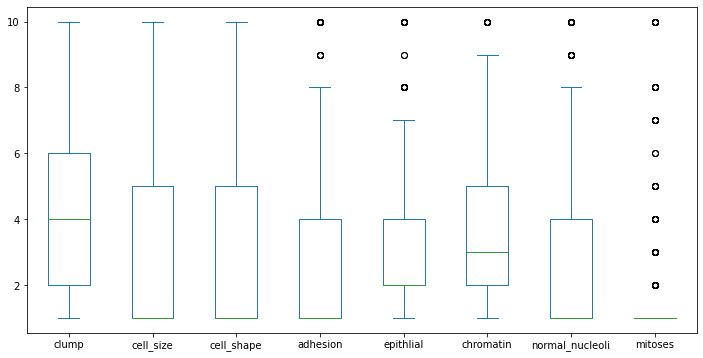

In [28]:
#데이터의 범위가 비슷해보이지만, boxplot으로 보니 조금 정규화 시킬필요가 있음!

df.iloc[:,1:-1].plot(kind="box", layout=(1, 11), figsize=(12, 6))

In [29]:
df.isnull().sum()

id                 0
clump              0
cell_size          0
cell_shape         0
adhesion           0
epithlial          0
bare_nuclei        0
chromatin          0
normal_nucleoli    0
mitoses            0
class              0
dtype: int64

In [30]:
# 진짜 결측치가 없는지 확인하기

for i in df.columns:
    print(i,"열의 unique는???  \n",df[i].unique(),"\n")

id 열의 unique는???  
 [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  11

**bare_nuclei열**에서 ? 결측치를 발견함!

# 데이터 전처리

## id 삭제하기

In [95]:
tmp = df.copy()

In [96]:
# 필요없는 열 삭제하기
tmp.drop("id", axis=1, inplace=True)

In [97]:
tmp.head()

,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## bare_nuclei - 결측치 처리 & 형변환하기

In [98]:
#위에서 봤지만, 한번더 unique() 살펴보기

tmp.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

### 결측치 처리

In [99]:
tmp.bare_nuclei.replace("?",np.nan,inplace=True)
tmp.bare_nuclei.isnull().sum()

16

In [100]:
print('전체 데이터 수 중 결측치가 차지하는 비율은? ',tmp.bare_nuclei.isnull().sum()/len(tmp)*100,"%")

전체 데이터 수 중 결측치가 차지하는 비율은?  2.28898426323319 %


<AxesSubplot:ylabel='Density'>

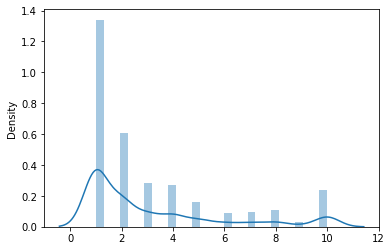

In [101]:
# 결측치가 아닌 것들의 데이터는 어떤 그래프를 그릴까??

sns.distplot(tmp[tmp.bare_nuclei.notnull()].astype(float))

# 한쪽으로 편향된 걸 볼수있다! 그래서 평균값으로 

In [102]:
# 평균값
tmp[tmp.bare_nuclei.notnull()].astype(float).bare_nuclei.mean()

3.5446559297218156

In [103]:
# 중앙값
tmp[tmp.bare_nuclei.notnull()].astype(float).bare_nuclei.median()

1.0

In [104]:
# 최빈값
tmp[tmp.bare_nuclei.notnull()].astype(float).bare_nuclei.mode()[0]

1.0

In [105]:
# 최빈값으로 결측치를 채워보자!!

#최빈값
freq = tmp[tmp.bare_nuclei.notnull()].astype(float).bare_nuclei.mode()[0]

tmp.bare_nuclei.replace(np.nan, int(freq), inplace=True)

In [106]:
tmp.isnull().sum()

clump              0
cell_size          0
cell_shape         0
adhesion           0
epithlial          0
bare_nuclei        0
chromatin          0
normal_nucleoli    0
mitoses            0
class              0
dtype: int64

### 형변환하기

In [107]:
tmp.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', 1, '5', '8', '6'], dtype=object)

In [109]:
# 형변환하기
tmp.bare_nuclei = tmp.bare_nuclei.astype(int)

In [112]:
tmp.bare_nuclei.unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

# X/ y 선택하기

In [117]:
# 독립변수
X= tmp.drop("class", axis=1)

# 종속변수
y= tmp["class"]

# 정규화시키기(Standard Scaler)

In [120]:
from sklearn.preprocessing import StandardScaler

st= StandardScaler()

X = st.fit_transform(X)

# Train / Test 나누기

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                  test_size=0.2,
                                                  random_state=10)

In [122]:
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (559, 9)
test data 개수:  (140, 9)


# 의사결정나무 모형

In [124]:
# entropy(다른 종류의 값을 섞여있는 정도를 나타내기)

from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(criterion='entropy',
                            max_depth=5)

In [125]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [127]:
y_hat= tree.predict(X_test)

In [128]:
# 예측값

y_hat[:10]

array([4, 2, 2, 2, 2, 4, 2, 2, 4, 2], dtype=int64)

In [130]:
# 실제값

y_test.values[:10]

array([4, 2, 2, 2, 2, 4, 2, 2, 4, 2], dtype=int64)

# 모형성능평가

## Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix

tree_matrix = confusion_matrix(y_test, y_hat)

In [144]:
tree_matrix

array([[94,  4],
       [ 4, 38]], dtype=int64)

In [156]:
labels = ['TN','FP','FN','TP']
labels = np.array(labels).reshape(2,2)

array([['TN', 'FP'],
       ['FN', 'TP']], dtype='<U2')

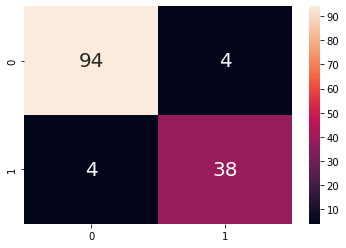

In [155]:
sns.heatmap(data=tree_matrix, annot=True,
            annot_kws={'size':20},
           fmt="")
labels

# 평가지표 계산

In [160]:
from sklearn.metrics import classification_report

tree_report = classification_report(y_test, y_hat)
print(tree_report)

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        98
           4       0.90      0.90      0.90        42

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



양성(2) / 악성(4)
오호! 0.93~0.94 정도의 결과가 나오다니! 